In [1]:
import networkx as nx
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt

# full network
G = nx.read_gpickle('HarryPotterNetwork.gpickle') 

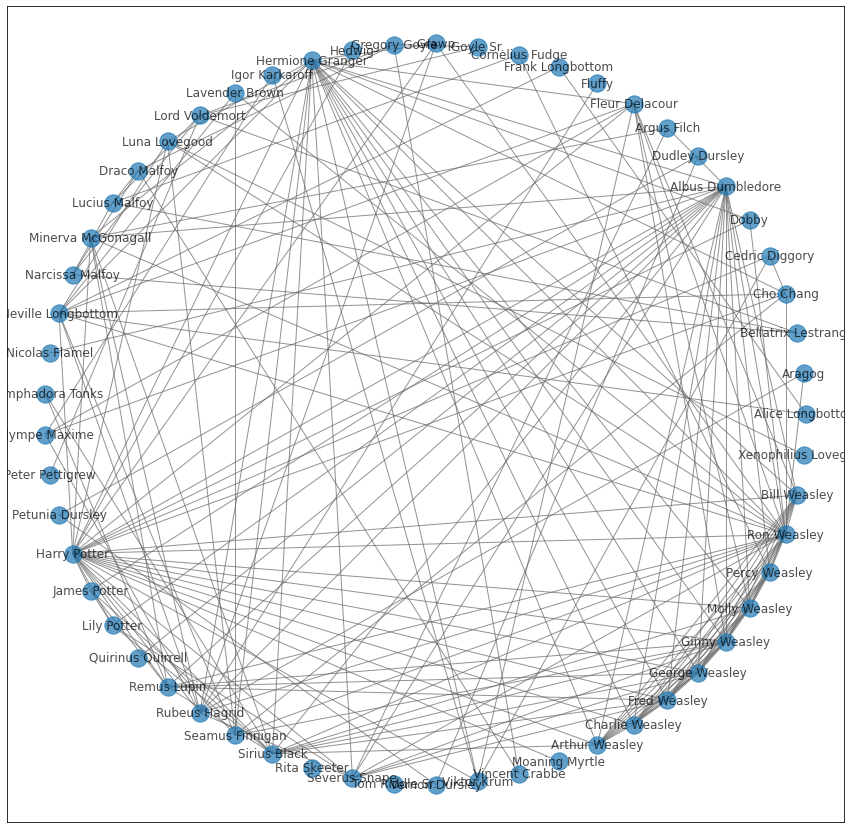

In [2]:
plt.figure(figsize=(15,15))
nx.draw_networkx(G, nx.circular_layout(G), alpha=0.7, with_labels=True, edge_color='.4')

In [5]:
df = pd.DataFrame(index=G.nodes())
df['School'] = pd.Series(nx.get_node_attributes(G, 'School')) 
df['House'] = pd.Series(nx.get_node_attributes(G, 'House')) 
df['Gender'] = pd.Series(nx.get_node_attributes(G, 'Gender')) 
df['Species/Race'] = pd.Series(nx.get_node_attributes(G, 'Species/Race')) 
df['Profession'] = pd.Series(nx.get_node_attributes(G, 'Profession')) 
df['Blood'] = pd.Series(nx.get_node_attributes(G, 'Blood')) 

df.head()

<ipython-input-5-e678f004b3fe>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df['House'] = pd.Series(nx.get_node_attributes(G, 'House'))


,School,House,Gender,Species/Race,Profession,Blood
Alice Longbottom,Unknown,NaN,Female,Witch,Auror,Unknown
Aragog,Unknown,NaN,Male,Acromantula,Unknown,Unknown
Bellatrix Lestrange,Hogwarts,NaN,Female,Witch,Unknown,Pure blood
Cho Chang,Hogwarts,NaN,Female,Witch,Unknown,Unknown
Cedric Diggory,Hogwarts,NaN,Male,Wizard,Unknown,Unknown


In [6]:
df['clustering'] = pd.Series(nx.clustering(G)) 
df['degree'] = pd.Series(dict(G.degree())) 
df.head() 

,School,House,Gender,Species/Race,Profession,Blood,clustering,degree
Alice Longbottom,Unknown,NaN,Female,Witch,Auror,Unknown,1.000000,2
Aragog,Unknown,NaN,Male,Acromantula,Unknown,Unknown,1.000000,2
Bellatrix Lestrange,Hogwarts,NaN,Female,Witch,Unknown,Pure blood,1.000000,3
Cho Chang,Hogwarts,NaN,Female,Witch,Unknown,Unknown,0.733333,6
Cedric Diggory,Hogwarts,NaN,Male,Wizard,Unknown,Unknown,0.666667,3


In [7]:
df2 = pd.DataFrame(index=G.edges()) 
#df2['sign'] = pd.Series(nx.get_edge_attributes(G, 'sign'))
df2.head()

Empty DataFrame
Columns: []
Index: [(Alice Longbottom, Frank Longbottom), (Alice Longbottom, Neville Longbottom), (Aragog, Rubeus Hagrid), (Aragog, Ron Weasley), (Bellatrix Lestrange, Lord Voldemort)]

In [60]:
df2['preferential attachment']= [i[2] for i in nx.preferential_attachment(G, df2.index)]
df2['resource_allocation_index']= [i[2] for i in nx.resource_allocation_index(G, df2.index)]

df2

sign  preferential attachment  \
Alice Longbottom    Frank Longbottom      +                        4   
                    Neville Longbottom    +                       22   
Aragog              Rubeus Hagrid         +                       22   
                    Ron Weasley           +                       50   
Bellatrix Lestrange Lord Voldemort        +                       18   
...                                     ...                      ...   
Molly Weasley       Percy Weasley         +                      130   
                    Ron Weasley           +                      325   
Percy Weasley       Bill Weasley          +                      120   
                    Ron Weasley           +                      250   
Ron Weasley         Bill Weasley          +                      300   

                                        resource_allocation_index  
Alice Longbottom    Frank Longbottom                     0.090909  
                    Neville Longbottom                   0.500000  
Aragog              Rubeus Hagrid                        0.040000  
                    Ron Weasley                          0.090909  
Bellatrix Lestrange Lord Voldemort                       0.450000  
...                                                           ...  
Molly Weasley       Percy Weasley                        0.548387  
                    Ron Weasley                          0.872096  
Percy Weasley       Bill Weasley                         0.541977  
                    Ron Weasley                          0.585311  
Ron Weasley         Bill Weasley                         0.794257  

[193 rows x 3 columns]